#Investigating a Dataset
###DAND Project 2

##Introduction

I have investigated the Titanic dataset provided for this project. It contains demographics and other information about 891 individuals who were aboard the Titanic during the tragic event.

##Question

Were there more members of one gender that survived, relative to their own gender, compared to the other gender?

##The Dataset

In [2]:
import numpy as np
import pandas as pd

data = pd.read_csv('titanic_data.csv')

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


##Investigation

The type of data available in this dataset is described by the column titles.

In [4]:
list(data.columns.values)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

Not all of this data is relevant to gender and survivability. Only the 'Sex' and 'Survived' data will be used for this investigation.



Total females:

In [5]:
t_f = data[data['Sex'] == 'female'][data.columns.delete([0,2,3,5,6,7,8,9,10,11])]
total_females = t_f.Sex.count()
total_females

314

Total males:

In [6]:
t_m = data[data['Sex'] == 'male'][data.columns.delete([0,2,3,5,6,7,8,9,10,11])]
total_males = t_m.Sex.count()
total_males

577

Amounts of females who survived:

In [10]:
s_f = data[data['Sex'] == 'female'][data['Survived'] == 1][data.columns.delete([0,2,3,5,6,7,8,9,10,11])]
survived_females = s_f.Sex.count()
survived_females

233

Amounts of males who survived:

In [8]:
s_m = data[data['Sex'] == 'male'][data['Survived'] == 1][data.columns.delete([0,2,3,5,6,7,8,9,10,11])]
survived_males = s_m.Survived.count()
survived_males

109

Amount of females who did not survive:

In [9]:
n_f = data[data['Sex'] == 'female'][data['Survived'] == 0][data.columns.delete([0,2,3,5,6,7,8,9,10,11])]
notSurvived_females = n_f.Survived.count()
notSurvived_females

81

Amount of males who did not survive:

In [10]:
n_m = data[data['Sex'] == 'male'][data['Survived'] == 0][data.columns.delete([0,2,3,5,6,7,8,9,10,11])]
notSurvived_males = n_m.Survived.count()
notSurvived_males

468

Preparing code for the next set of calculations:

In [11]:
total_males = float(total_males)
total_females = float(total_females)
survived_males = float(survived_males)
survived_females = float(survived_females)

Percentage of females who survived:

In [12]:
(survived_females*100) / (total_females)

74.20382165605096

Percentage of males who survived:

In [13]:
(survived_males*100) / (total_males)

18.890814558058924

Total females and males in the set:

In [14]:
total = total_females + total_males
total

891.0

Percentage of females in the total set:

In [15]:
total_females*100 / total

35.24130190796858

Percentage of males in the total set:

In [16]:
total_males*100 / total

64.75869809203142

Percentage of female survivors over the total set:

In [17]:
percentage_s_f = survived_females*100 / total
percentage_s_f

26.150392817059483

Percentage of male survivors over the total set:

In [18]:
percentage_s_m = survived_males*100 / total
percentage_s_m

12.2334455667789

Percentage of all survivors in the whole set:

In [19]:
survivors = (survived_females + survived_males)
percentage_s_t = survivors*100 / total
percentage_s_t

38.38383838383838

Percentage of survived females over the total survivors set:

In [20]:
percentage_s_f*100 / percentage_s_t

68.12865497076024

Percentage of survived males over the total survivors set:

In [21]:
percentage_s_m*100 / percentage_s_t

31.87134502923977

##Plot

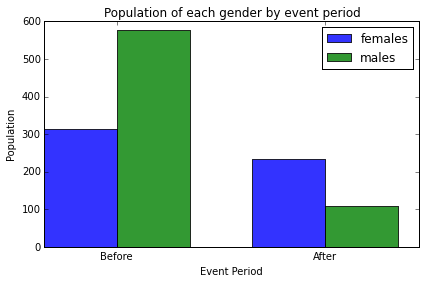

In [29]:
import matplotlib.pyplot as plt

%matplotlib inline

females = pd.DataFrame()
females = (t_f.Sex.count(), s_f.Sex.count())
males = pd.DataFrame()
males = (t_m.Sex.count(), s_m.Sex.count())

# create plot
fig, ax = plt.subplots()
index = np.arange(2)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, females, bar_width,
                 alpha=opacity,
                 color='b',
                 label='females')
 
rects2 = plt.bar(index + bar_width, males, bar_width,
                 alpha=opacity,
                 color='g',
                 label='males')
 
plt.xlabel('Event Period')
plt.ylabel('Population')
plt.title('Population of each gender by event period')
plt.xticks(index + bar_width, ('Before', 'After'))
plt.legend()
 
plt.tight_layout()
plt.show()

Where the male population was roughly twice the female quantity, it became half the female quantity after the event.

##Conclusion

Before the event occurred, the male population outnumbered the female population by nearly two times:

In [22]:
total_males / total_females

1.8375796178343948

But during the tragic event, males had over three times the chances of not surviving than females:

In [23]:
male_death_rate = ((total_males - survived_males) / total_males)               # 0.811092
female_death_rate = ((total_females - survived_females) / total_females)       # 0.257962

male_death_rate / female_death_rate

3.1442326208357407

After the event, the Titanic female population outnumbered the Titanic male population by over two times:

In [24]:
survived_females / survived_males

2.1376146788990824